# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [1]:
import sys

**Как получить путь к интерпретатору?**

In [2]:
sys.executable

'/Users/Irina/anaconda/bin/python'

**Как узнать, где ищутся модули для импорта?**

In [3]:
sys.path

['',
 '/Users/Irina/anaconda/lib/python36.zip',
 '/Users/Irina/anaconda/lib/python3.6',
 '/Users/Irina/anaconda/lib/python3.6/lib-dynload',
 '/Users/Irina/.local/lib/python3.6/site-packages',
 '/Users/Irina/anaconda/lib/python3.6/site-packages',
 '/Users/Irina/anaconda/lib/python3.6/site-packages/Sphinx-1.5.1-py3.6.egg',
 '/Users/Irina/anaconda/lib/python3.6/site-packages/aeosa',
 '/Users/Irina/anaconda/lib/python3.6/site-packages/wing-0.1.4-py3.6.egg',
 '/Users/Irina/anaconda/lib/python3.6/site-packages/IPython/extensions',
 '/Users/Irina/.ipython']

**Что может помочь написать кросс-платформенный код?**

In [4]:
sys.platform

'darwin'

**Как перенаправить поток вывода?**

In [5]:
with open('log.txt', 'w') as f:
    print(2, file=f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [6]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [7]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [8]:
import this

In [9]:
sys.stdout = stdout 

In [10]:
import re
from collections import Counter, OrderedDict

In [11]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [12]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [13]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [15]:
def generate_int_array(size, element, p_elem):
    """
        This function generates array of integers in range [0, 5] with given probability 
        of definite element in range [0, 5]. The remaining elements are generated
        from uniform distribution.
        
        :param size: Size of array
        :type size: int
        
        :param element: Element in range [0, 5] with given probability 
        :type element: int
        
        :param p_elem: Probability of element, in [0,1]
        :type p_elem: float
        
        :returns: New random array if range [0, 5] with probability p_elem for element.
        :rtype: list
    """
    try:
        size = int(size)
        element = int(element)
        p_elem = float(p_elem)
    except ValueError:
        print("Wrong number type")
        raise

    if size <= 0:
        raise ValueError('size should be positive')
    if (element < 0) or (element > 5):
        raise ValueError('element should be in range [0,5]')
    if (p_elem < 0) or (p_elem > 1):
        raise ValueError('p_elem should be in range [0,1]')

    np.random.seed(123)
    elements = list(range(6))
    p_not_elem = (1 - p_elem) / (len(elements) - 1)
    probabilities = []
    for e in elements:
        if e == element:
            probabilities.append(p_elem)
        else:
            probabilities.append(p_not_elem)
    return np.random.choice(elements, size, p=probabilities)


# generate_int_array(32, 3, 0.4)

In [16]:
def delete_zeros_from_array(array):
    """
        This function deletes all elements that equal to 0 from array. 
        
        :param array: Input array
        :type array: list
        
        :returns: New array without 0 with the other elements in the same order
        :rtype: list
    """
    len_arr = len(array)
    counter = 0
    idx_e = 0
    idx = 0
    i = 0
    
    while (i < len_arr):
        if array[i] == 0:
            idx_e = i
        else:
            idx = i

        while (array[i] == 0):
            counter = counter + 1
            i = i + 1
            if i == len_arr:
                return array[:(len_arr - counter)]

        idx = i
            
        if (idx > idx_e) and (counter > 0):
            array[idx - counter] = array[idx]
            array[idx] = 0
            idx_e = i
        
        i = i + 1
            
    return array[:(len_arr - counter)]
            
# delete_zeros_from_array([1,0,0,3,3])
# delete_zeros_from_array([1,0,3,3])
# delete_zeros_from_array([1,0,3,0,3])
# delete_zeros_from_array([0, 1, 2, 0, 0, 3, 0])
# delete_zeros_from_array([0,0, 1,1, 2, 0,0, 6, 0, 1,1,0,2,0,0,0])
# delete_zeros_from_array([1,2,4,0,4,4,3,1,4,4,4])
delete_zeros_from_array([1,2,4,4,4,3,1,4,4,4,0])

[1, 2, 4, 4, 4, 3, 1, 4, 4, 4]

In [17]:
def graphs(func, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    lens = np.linspace(10, 10000, num=100, dtype=int)
    times = []

    for i in lens:
        array = list(generate_int_array(i, element, 0.5))
        st = time.time()
        res = func(array)
        et = time.time()
        times.append((et - st) * 1000)

    plt.figure(figsize=(15, 7))
    plt.title('Function run time depending on the length of the arrays')
    plt.ylabel('Time in ms')
    plt.xlabel('The length of array')
    plt.plot(lens, times)

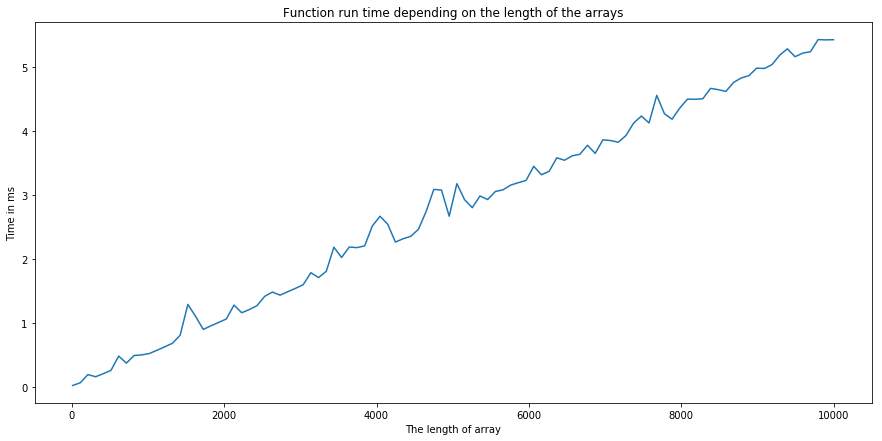

In [18]:
graphs(delete_zeros_from_array, 0)

In [19]:
from functools import partial


def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    len_arr = len(array)
    counter = 0
    idx_e = 0
    idx = 0
    i = 0

    while (i < len_arr):
        if array[i] == element:
            idx_e = i
        else:
            idx = i

        while (array[i] == element):
            counter = counter + 1
            i = i + 1
            if i == len_arr:
                return array[:(len_arr - counter)]

        idx = i

        if (idx > idx_e) and (counter > 0):
            array[idx - counter] = array[idx]
            array[idx] = element
            idx_e = i

        i = i + 1

    return array[:(len_arr - counter)]


delete_zeros_from_array_part = partial(delete_elements_from_array, element=0)
# delete_zeros_from_array_part([1,2,4,0,4,4,3,1,4,4,4], element=3)

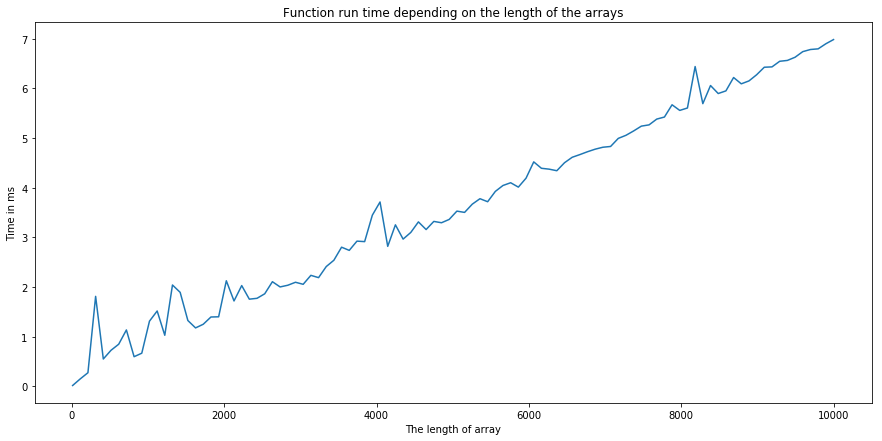

In [20]:
graphs(delete_zeros_from_array_part, 1)

Зачем нужна doc string? 

__Ответ:__ doc string нужны для того, чтобы создавать автоматическую документацию для модулей, функций, классов и методов. 

Как её посмотерть?

In [21]:
print(graphs.__doc__)


        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    


### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [22]:
def calculate_module(number):
    """ 
        Find the module of complex number.
        
        :param number: Input complex number
        :type number: {int, float, complex}
        
        :returns: The module of number
        :rtype: float
    """
    if not isinstance(number, (int, float, complex)):
        raise TypeError("Wrong number type for %s " % number)
    return np.sqrt(number.real**2 + number.imag**2)


# calculate_module(9+8j)

In [23]:
def find_min(n1, n2, n3):
    """
        Find the number with minimum module among 3 complex numbers.
        
        :param n1: Input complex number 1
        :type n1: {int, float, complex}
        
        :param n2: Input complex number 2
        :type n2: {int, float, complex}
        
        :param n3: Input complex number 3
        :type n3: {int, float, complex}
        
        :returns: The number (n1, n2 or n3) with the minimum module 
        :rtype: float
    """
    nums = [n1, n2, n3]
    for n in nums:
        if not isinstance(n, (int, float, complex)):
            raise ValueError("Wrong number type for %s " % n)

    min_sq_mod = calculate_module(nums[0])
    min_sq_mod_id = 0
    for i, n in enumerate(nums[1:]):
        cur_sq_mod = calculate_module(n)
        if (cur_sq_mod < min_sq_mod):
            min_sq_mod = cur_sq_mod
            min_sq_mod_id = i + 1

    return nums[min_sq_mod_id]


# find_min(-3 + 9j, None, complex(1, 2))
# find_min(-3 + 9j, 3 + 6j, complex(1, 2))
# find_min(3,"[4,3]",90j+1)
# find_min(np.inf,np.inf,np.inf)

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [24]:
def devide_into_four(number, n):
    """
        Devide the number into n parts of equal length.
        
        :param number: Input positive number, its length should be a multiple of n
        :type number: int
        
        :param n: The number of parts to devide, > 0 
        :type n: int
        
        :returns: The number devided into 4 parts of equal length
        :rtype: list
    """
    try:
        number = int(number)
        n = int(n)
    except ValueError:
        print("Wrong number type")
        raise

    if number <= 0:
        raise ValueError('number should be positive')
    if n <= 0:
        raise ValueError('n should positive')

    number = np.array([x for x in str(number)])

    if len(number) % 4 != 0:
        raise Exception('Can not devide number into equal parts')

    number = [list(x) for x in np.array_split(number, n)]
    return [int("".join(x)) for x in number]


# devide_into_four(1234567890123355, 4)
# devide_into_four(12434, 4)

In [25]:
from functools import lru_cache
import sys
sys.setrecursionlimit(30100)


@lru_cache(maxsize=None)
def calculate_fibonacci(number):
    """
        Calculate fibonacci of given number.
        
        :param number: Input positive number
        :type number: int
        
        :returns: Fibonacci of given number
        :rtype: int
    """
    try:
        number = int(number)
    except ValueError:
        print("Wrong number type")
        raise

    if number <= 0:
        raise ValueError('number should be positive')

    if (number == 1) or (number == 2):
        return 1
    else:
        return calculate_fibonacci(number - 1) + calculate_fibonacci(number - 2)


# calculate_fibonacci(9999)

In [26]:
def calculate_GCD(n1, n2):
    """
        Finds the greatest common divider of n1 and n2 with Euclidean algorithm.
        
        :param n1: Input positive number 1
        :type n1: int
        
        :param n2: Input positive number 2
        :type n2: int
        
        :returns: The greatest common divider of n1 and n2
        :rtype: int
    """
    try:
        n1 = int(n1)
        n2 = int(n2)
    except ValueError:
        print("Wrong number type")
        raise

    if n1 <= 0:
        raise ValueError('n1 should be positive')
    if n2 <= 0:
        raise ValueError('n2 should positive')

    while (n1 != 0) and (n2 != 0):
        if n1 > n2:
            n1 = n1 % n2
        else:
            n2 = n2 % n1
    return n1 + n2


# calculate_GCD(10,5)
# calculate_GCD("s10",5)

In [27]:
def calculate_median(array):
    """
        Calculate the median of the array.
        
        :param array: Input array, length > 0
        :type array: list
        
        :returns: The median of the array
        :rtype: {int, float}
    """
    if not isinstance(array, list):
        raise TypeError("Wrong number type for %s " % array)

    len_array = len(array)

    if len_array == 0:
        raise Exception("Can not find median of empty array")

    array = sorted(array)
    idx_median = (len_array - 1) // 2
    if len_array % 2 == 1:
        return array[idx_median]
    else:
        return (array[idx_median] + array[idx_median + 1]) / 2
    return


# calculate_median([1,2,3,4])
# calculate_median([5,2,6,1,2])
# calculate_median([5.1,2.2,6.3,1.2,2.2])
# calculate_median([])

In [28]:
from itertools import permutations


def ATM(card, pin):
    """
        Reads the number of the card inserted into ATM, parses it 
        into 4 equal parts and generates 4 Fibonacci numbers with 
        numbers corresponding to the parched parts. Then it generates 
        numbers from all kinds of permutations of the obtained 
        Fibonacci numbers (concatenation). For each number from the 
        set received, the ATM finds a GCD with the password entered 
        by the user and returns the median of the received GCDs.
        
        :param card: Input positive card number
        :type card: int
        
        :param card: Input positive card number
        :type card: int
        
        :returns: The median of the array described above.
        :rtype: {int, float}
    """
    try:
        card = int(card)
        pin = int(pin)
    except ValueError:
        print("Wrong number type")
        raise

    if card <= 0:
        raise ValueError('card should be positive')
    if pin <= 0:
        raise ValueError('pin should positive')

    len_card = len(str(card))
    nums = devide_into_four(card, 4)
    fibs = [calculate_fibonacci(x) for x in nums]
    perm = list(permutations(fibs))
    perm_join = [int("".join([str(x) for x in p])) for p in perm]
    gcfs = [calculate_GCD(x, pin) for x in perm_join]
    return calculate_median(gcfs)


# ATM('4444', 1245)
# ATM(4444, 1245)
ATM(4444888305382092, 1242)

18.0

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [29]:
import numpy as np

In [30]:
import time
from collections import deque

N = 50000

types = [deque, list]


def append(x):
    """
        Append N elements to the end of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    for i in range(N):
        x.append(i)


def appendleft(x):
    """
        Append N elements to the begining of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if isinstance(x, deque):
        for i in range(N):
            x.appendleft(i)
    else:
        for i in range(N):
            x.insert(0, i)


def pop(x):
    """
        Delete N elements from the end of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")
        
    if len(x) == 0:
        raise ValueError("Can not pop elements from empty list / deque")

    for i in range(N):
        x.pop()


def popleft(x):
    """
        Delete N elements from the begining of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")
        
    if len(x) == 0:
        raise ValueError("Can not pop elements from empty list / deque")

    if isinstance(x, deque):
        for i in range(N):
            x.popleft()
    else:
        for i in range(N):
            x.pop(0)


def remove(x):
    """
        Remove the first occurrence of values in range [0, N]
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if len(x) == 0:
        raise ValueError("Can not remove elements from empty list / deque")
    
    for i in range(N):
        x.remove(i)


def rotate(x):
    """
        Rotate the array n steps to the right. n in range [0,N]
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")
        
    if len(x) == 0:
        raise ValueError("Can not rotate elements from empty list / deque")

    if isinstance(x, deque):
        for i in range(N):
            x.rotate(i)
    else:
        for i in range(10, -1, -1):
            x[i:] + x[:i]


def count(x):
    """
        Count the number of array elements equal to n, n in range [0,N].
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    for i in range(N):
        x.count(i)


def insert(x):
    """
        Insert n into the deque at position 1, n in range [0,N].
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    for i in range(N):
        x.insert(i, 1)


def index(x):
    """
        Return the position of n in the array, n in range [0,N].
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")
        
    if len(x) == 0:
        raise ValueError("Can not index elements from empty list / deque")

    for i in range(N):
        x.index(i)


funcs = [
    append, appendleft, pop, popleft, remove, rotate, count, insert, index
]

for type in types:
    for func in funcs:
        array = type(range(N))
        st = time.time()
        func(array)
        et = time.time()
        alltime = et - st
        print("%s / %s : %.3f " % (type.__name__, func.__name__, alltime))

    print('-------------------------------------')

deque / append : 0.006 
deque / appendleft : 0.005 
deque / pop : 0.006 
deque / popleft : 0.005 
deque / remove : 0.007 
deque / rotate : 0.427 
deque / count : 36.566 
deque / insert : 1.592 
deque / index : 18.878 
-------------------------------------
list / append : 0.005 
list / appendleft : 2.535 
list / pop : 0.007 
list / popleft : 0.482 
list / remove : 0.471 
list / rotate : 0.007 
list / count : 33.820 
list / insert : 1.711 
list / index : 17.353 
-------------------------------------


### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [39]:
def my_permutations(array):
    """
        Return permutations of elements in array
        
        :param array: Input array, length > 0
        :type array: list
        
        :returns: Permutations of elements in array
        :rtype: list
    """         
    array = list(array)
    len_array = len(array)
    

    if len_array <= 1: 
        return [array] 
  
    final_perm = [] 
    for i in range(len_array): 
        for perm in my_permutations(array[:i] + array[i+1:]): 
            final_perm.append([array[i]] + perm)

    return final_perm 

In [40]:
arr = [1,2,3,3,1,2,4]
# arr = ['1','2','3']
# arr = []
print(len(my_permutations(arr)) == len(list(permutations(arr))))

True


In [41]:
funcs = [permutations, my_permutations]
np.random.seed(123)
array = np.random.randint(3, size=10)
print('Random array:', array)

for func in funcs:
    st = time.time()
    func(array)
    et = time.time()
    alltime = et - st
    print(func.__name__, ':', alltime)

Random array: [2 1 2 2 0 2 2 1 2 1]
permutations : 1.4781951904296875e-05
my_permutations : 26.42048716545105
